<a href="https://colab.research.google.com/github/faro7ah/Impact-of-Covid-19-in-a-global-economy-Data-Science-Bootcamp-Capstone-Project-SDA-Coding-Dojo/blob/main/DS_Bootcamp_Impact_of_Covid_19(Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impact of Covid-19 Pandemic on the Global Economy  (Capstone Project)**

## **Introduction:**
"The Global COVID-19 pandemic has infected millions of the world's population at a shocking speed. Its
emergence has halted and brought down economic activities across the globe due to the imposition on mobility to
curtail the disease's spread. Over some decades, the world has not witnessed such an experience. However, it has a
significant toll on various economies due to shocks emanating from deteriorating human and health conditions
(World Bank, 2020)".

### **Project Overview:**
In this project, I will try to find how Covid-19 impact the global economy of 170 countries all over the world.


I will approach this problem by firstly, cleaning up the messy data, then doing exploratory analysis(EDA), and finding out who is my most affected countries. Finally, I will create a model to aid us in predicting GDP per capita for countries.

## **Analysis:**
**Part I: Data Exploration:**

In this project, we were given one investigative file. Firstly, I will start analyzing to explore and take a look at the data we have. We have to check if it includes messy data, clean or not. Also, if each column has the right data type, Moreover, if the column called Date is saved as Object or String, then we need to convert it to Date Time.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
 #install chart_studio package 
!pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


In [4]:
!pip install plotly

In [5]:
# install datapane package 
!pip3 install -U datapane

     |████████████████████████████████| 1.1MB 5.5MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 645kB 19.5MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 174kB 23.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Created wheel for stringcase: filename=stringcase-1.2.0-cp37-none-any.whl size=3577 sha256=2f9267e3a7183850eef34ce4565f6f3dd669e269a3bdd2bcb1620e86bf48730a
  Stored in directory: /root/.cache/pip/wheels/a0/16/a0/16e2c81dbd47503b5a35583dfabde5a93b4cf98dbf0033dad5
  Created wheel for micawber: filename=micawber-0.5.3-cp37-none-any.whl size=22157 sha256=65438432a2cf2d57c0f06e462604f2a15fcc1c3f13eccc6002f1691f05b5c7cd
  Stored in directory: /root/.cache/pip/wheels/e2/c5/fe/bc94a8efb4f8673765f2bedf479d9bde213ee9464f1c8c8e68
  Created wheel for face: filename=face-20.1.1-cp37-none-any.whl size=51078 sha256=e120c9

In [6]:
#install pycountry and pycountry_convert packages
!pip install pycountry
!pip install pycountry_convert

     |████████████████████████████████| 10.1MB 5.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=978e5aef56b963bdedde1f680e81239bed62ce7f270ed2d5140d0db0690c1158
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 245kB 5.2MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1


In [7]:
# import libraries
import pycountry_convert as pc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import chart_studio
import chart_studio.plotly as py
import plotly.express as px
import requests
import datetime
import altair as alt
import datapane as dp
import plotly.graph_objs as go
from plotly import tools
import plotly
import colorlover as cl
from IPython.display import HTML
!pip install -q kaggle

In [9]:
# #Connected to datapane t upload plotly charts
!datapane login --server='https://datapane.com' --token='e4ba3189c0e09de23e8009bd25dd7f70f8a56832'


Connected successfully to https://datapane.com as farahh212


In [10]:
# #connect to Plotly
username = 'farah12' # your username
api_key = 'SLGX4DRfX0Tm2xE3iJJ5'#your Key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [11]:
df1 = pd.read_csv("https://raw.githubusercontent.com/faro7ah/Impact-of-Covid-19-in-a-global-economy-Data-Science-Bootcamp-Capstone-Project-SDA-Coding-Dojo/main/data/transformed_data.csv")

In [12]:
df2= pd.read_csv('https://raw.githubusercontent.com/faro7ah/Impact-of-Covid-19-in-a-global-economy-Data-Science-Bootcamp-Capstone-Project-SDA-Coding-Dojo/main/data/raw_data.csv')

In [13]:
df1.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [14]:
df2.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [15]:
#fix pop column in df1 dataframe 
population = df2.population
df1["POP"] = population

In [16]:
df1.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,38928341,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,38928341,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,38928341,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,38928341,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,38928341,7.497754


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  int64  
 8   GDPCAP   50418 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.5+ MB


**Part II: Data understanding**


- **Code** - Represents the ISO Codes for each country.
- **Country** - Contains the names of countries whose impact of  COVID-19.
- **Date** - We are considering cases from December 2019 to October 2020.
- **Month** - Contains months from December 2019 to October 2020.
- **POP** - Shows the population of each country around the world. Crucial for our analysis.
- **GDPCAP** - Represents the GDP per Capita offered by a country. GDP is the Gross Domestic Product. It refers to the sum of money that a particular state can use for the welfare of its citizens. GDP per Capita is the division of the GDP among the citizens. Higher the GDP per Capita, more the country is capable of handling pandemic level situations like COVID-19.
- **HDI** - Human Development Index - a composite measure
of education, life expectancy at birth, and per
capita income indicators.

- **TC** - Refers to Total Cases worldwide. Measured daily, this tally gives us the number of people affected by the COVID-19 pandemic.
-  **TD** - Refers to Total Deaths. Measured daily, recorded from December 31 2019 to October 19 2020.
- **STI** - This is a composite measure
based on nine response indicators, including
school closures, workplace closures, and travel
bans, rescaled to a value from 0 to 100 (100 =
strictest). If policies vary at the subnational level,
the index is shown as the strictest sub-regions
response level

In [18]:
df1.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,38928341,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,38928341,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,38928341,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,38928341,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,38928341,7.497754


In [19]:
df1.CODE.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

In [20]:
#take a random look of our dataset
df1.sample(10)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
43574,SUR,Suriname,2020-03-22,0.720,1.609438,0.000000,3.966132,586634,9.530038
41165,SXM,Sint Maarten (Dutch part),2020-04-27,NaN,4.304065,2.564949,0.000000,42882,10.500323
20606,HTI,Haiti,2020-09-23,0.498,9.063347,5.407172,3.773221,11402533,7.410452
35234,PAK,Pakistan,2020-05-31,0.562,11.149024,7.301822,4.411707,220892331,8.524111
37083,PRT,Portugal,2020-04-28,0.847,10.091791,6.854355,4.411707,10196707,10.237704
28130,MKD,Macedonia,2020-05-22,0.757,7.548556,4.709530,0.000000,2083380,9.481223
24817,KAZ,Kazakhstan,2020-08-22,0.800,11.745964,7.416378,4.329812,18776707,10.088123
35438,PSE,Palestine,2020-05-08,0.686,6.304449,1.386294,4.567468,5101416,8.400636
17394,GEO,Georgia,2020-02-05,0.780,0.000000,0.000000,2.967333,3989175,9.184518
38568,KNA,Saint Kitts and Nevis,2020-03-29,0.778,0.693147,0.000000,0.000000,53192,10.112710


In [21]:
#cheack the number of rows and columns in dataset
df1.shape

(50418, 9)

**Part III: Data Wrangling**

In this part, I will take a deep look through the data and solve some data wrangling to fix issues in columns such as:

- Split date into year, month and day.
- Rename columns into obvious names and change the data type of column date.
- Convert country_code and cuntry columns from object data type to string.
- Create new column for continent

In [22]:
#function to create new columns contan name of continent
def convert(row):
    # assign the name of the continent for each country if it exists in alpha2
  try:
    country_code = pc.country_name_to_country_alpha2(row.COUNTRY, cn_name_format='default')
    #and Unknown if it is not exist
  except:
    country_code = 'Unknown'
  try:
    conti_code= pc.country_alpha2_to_continent_code(country_code)
  except:
    conti_code= 'Unknown'
    #return name of continent
  return conti_code

In [23]:
# apply function on our dataset to get name of continent
df1['continent'] = df1.apply(convert, axis=1)

In [24]:
#check the unique values of continent
df1.continent.unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC', 'Unknown'], dtype=object)

In this section of the report, we will check for cleanliness,we will trim and clean our dataset for analysis.

In [25]:
#check for null values
df1.isna().sum()

CODE            0
COUNTRY         0
DATE            0
HDI          6202
TC              0
TD              0
STI             0
POP             0
GDPCAP          0
continent       0
dtype: int64

In [26]:
#check for duplicated values
df1.duplicated().sum()

0


In this part, I will fix issues in columns such as:
- Convert data type of `DATE` column from object to datetime.
- Split `date` into `year`, `month` and `day`.
- Rename columns into obvious names.
- Convert `country_code` and `cuntry` columns from object data type to string.


In [27]:
#convert ds to datatime
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [28]:
#split year into new column
df1['year'] = df1['DATE'].dt.year
#split month into new column
df1['month'] = df1['DATE'].dt.month
#split day into new column
df1['day'] = df1['DATE'].dt.day

In [29]:
 #rename columns into obvious column name
 df1.rename(columns={'CODE': 'country_code', 'COUNTRY': 'country', 'DATE': 'date',
                    'HDI': 'human_development_index',
                    'TC': 'total_cases', 'TD':'total_deaths',
                    'POP':'population','STI':'stringency_index', 'GDPCAP':'gdp_per_capita'}, inplace=True)

In [30]:
#check column names
df1.head()

,country_code,country,date,human_development_index,total_cases,total_deaths,stringency_index,population,gdp_per_capita,continent,year,month,day
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,38928341,7.497754,AS,2019,12,31
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,38928341,7.497754,AS,2020,1,1
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,38928341,7.497754,AS,2020,1,2
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,38928341,7.497754,AS,2020,1,3
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,38928341,7.497754,AS,2020,1,4


## **EDA(Exploratory Data Analysis):** 
- In this part, we will plot interactive charts to make interacting with our dataset.

In [31]:
#display column name 
df1.columns

Index(['country_code', 'country', 'date', 'human_development_index',
       'total_cases', 'total_deaths', 'stringency_index', 'population',
       'gdp_per_capita', 'continent', 'year', 'month', 'day'],
      dtype='object')

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country_code             50418 non-null  object        
 1   country                  50418 non-null  object        
 2   date                     50418 non-null  datetime64[ns]
 3   human_development_index  44216 non-null  float64       
 4   total_cases              50418 non-null  float64       
 5   total_deaths             50418 non-null  float64       
 6   stringency_index         50418 non-null  float64       
 7   population               50418 non-null  int64         
 8   gdp_per_capita           50418 non-null  float64       
 9   continent                50418 non-null  object        
 10  year                     50418 non-null  int64         
 11  month                    50418 non-null  int64         
 12  day                      50418 n

In [33]:
#for loop to determine numeric columns
numeric_column = [col for col in df1.select_dtypes(include=['float64']).columns]
numeric_column

['human_development_index',
 'total_cases',
 'total_deaths',
 'stringency_index',
 'gdp_per_capita']

In [34]:
#numeric columns in dataframe
numeric_cols =df1[numeric_column]
numeric_cols.head()

,human_development_index,total_cases,total_deaths,stringency_index,gdp_per_capita
0,0.498,0.0,0.0,0.0,7.497754
1,0.498,0.0,0.0,0.0,7.497754
2,0.498,0.0,0.0,0.0,7.497754
3,0.498,0.0,0.0,0.0,7.497754
4,0.498,0.0,0.0,0.0,7.497754


### Box plot for human_development_index, total_cases, total_deaths, stringency_index, and gdp_per_capita:

In [35]:
# #interactive Boxplot to check Outliers in numeric column
fig = go.Figure()
#  #for loop for numeric columns
for col in numeric_cols:
#    #boxplot 
    fig.add_trace(go.Box(y=numeric_cols[col][:8000].values, name=numeric_cols[col].name))
    fig.update_layout(
      height=800,plot_bgcolor='rgb(1000,1000,1000)',
      title_text='Box plot for human_development_index, total_cases, total_deaths, stringency_index, and gdp_per_capita')
#disply chart    
fig.show()
py.plot(fig, filename = 'gdp_per_cap', auto_open=True) #Publish the chart


'https://plotly.com/~farah12/40/'

### It is illustrated from the previous chart:
### - **Gdp_per_capita:** the median is around 9.36 and most of GDP_percapita falls between 8 and $10.3 thousand approximatelly, and we can notice one outlier which is 0.

### - **Total_cases:** We can immediately draw a few conclusions from this:
- The total_cases was usually below 16 thousand.
- In 75% of all cases, the total_cases was smaller than 11 thousand  (3rd Quantile)
- 50% of total_cases gave at least 7 thousand (Median).




---

---





In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country_code             50418 non-null  object        
 1   country                  50418 non-null  object        
 2   date                     50418 non-null  datetime64[ns]
 3   human_development_index  44216 non-null  float64       
 4   total_cases              50418 non-null  float64       
 5   total_deaths             50418 non-null  float64       
 6   stringency_index         50418 non-null  float64       
 7   population               50418 non-null  int64         
 8   gdp_per_capita           50418 non-null  float64       
 9   continent                50418 non-null  object        
 10  year                     50418 non-null  int64         
 11  month                    50418 non-null  int64         
 12  day                      50418 n

### A pairs plot to see both distributions of single global economy feature and relationships between these features that impacted by COVID-19:

In [37]:
import plotly.express as px
fig = px.scatter_matrix(df1.sample(20))
# chart title and size
fig.update_layout(title="Pair Plot For Impact of Covid-19 Pandemic on the Global Economy ",
                     dragmode='select',
                     width=3000,
                     height=2300,
                     hovermode='closest')
fig.show()
report = dp.Report(dp.Plot(fig) ) #Create a report
report.publish(name='Pair Plot For Impact of Covid-19 Pandemic on the Global Economy', open=True, visibility='PUBLIC') #Publish the report

Bokeh version 2.3.1 is not supported, your plots may not display correctly, please install version ~=2.2.0
Folium version 0.8.3 is not supported, your plots may not display correctly, please install version >=0.12.0


Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/farahh212/reports/pair-plot-for-impact-of-covid-19-pandemic-on-the-global-economy/




---

---





### Bar polt to display the rate of GDP for top 50 countries around the world:

In [38]:
#groupby countries to find gdp for top 50 countries
gpd_per_couuntry= df1.groupby(['country'])['gdp_per_capita'].sum()
#sort values
gpd_per_couuntry.sort_values()

country
Isle of Man                    0.000000
New Caledonia                  0.000000
Northern Mariana Islands       0.000000
Montserrat                     0.000000
Monaco                         0.000000
                               ...     
United Arab Emirates        3268.344692
Ireland                     3268.527298
Singapore                   3338.865511
Luxembourg                  3367.476814
Qatar                       3430.797317
Name: gdp_per_capita, Length: 210, dtype: float64

In [39]:
#Datafram for top 50 countries according GDP per capita
gpd_per_couuntry_ =gpd_per_couuntry.sort_values(ascending=False).head(50)
gpd_per_couuntry_ = gpd_per_couuntry_.to_frame(name='gpd_per_couuntry').reset_index()

In [40]:
#type(gpd_per_couuntry_)

In [41]:
gpd_per_couuntry_

,country,gpd_per_couuntry
0,Qatar,3430.797317
1,Luxembourg,3367.476814
2,Singapore,3338.865511
3,Ireland,3268.527298
4,United Arab Emirates,3268.344692
5,Kuwait,3260.539830
6,Norway,3257.244157
7,Switzerland,3221.645141
8,San Marino,3218.821733
9,United States,3204.866235


In [42]:
#interactive bar plot for top 50 countries according the GDP per capita 
fig = px.bar(gpd_per_couuntry_, y='gpd_per_couuntry', x='country', text='gpd_per_couuntry', color_discrete_sequence=px.colors.qualitative.Plotly)
#round GPD into 2 values 
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')#, marker_color='purple')
#chart title and colors
fig.update_layout(title="GPD Per Capita According Each Coutry", width=1200,height=800, plot_bgcolor='rgb(1000,1000,1000)')
#display chart
fig.show()
#publish chart 
py.plot(fig, filename = 'GDP Per Capita According Each Coutry', auto_open=True)

'https://plotly.com/~farah12/21/'

### From the previous chart, we can see that `Qatar, Luxembourg, Singapore, Ireland, United Arab Emirates, and Kuwait` recorded the top 5 rates of GDP per capita with `3430.797317, 3367.476814, 3338.865511, 3268.527298, 3268.344692, 3260.539830` respectively.



---

---









### The next pie charts illustrate the rate of total deaths and total cases under this global pandemic:

In [43]:
#gropby countries for total deaths rate
total_deaths_per_country= df1.groupby(['country'])['total_deaths'].sum()
total_deaths_per_country.sort_values()

country
Monaco                       0.000000
Timor                        0.000000
Liechtenstein                0.000000
British Virgin Islands       0.000000
Gibraltar                    0.000000
                             ...     
France                    2203.766710
China                     2205.740166
United Kingdom            2209.519314
Italy                     2327.710204
United States             2480.576064
Name: total_deaths, Length: 210, dtype: float64

In [44]:
#dataframe for countries and rate of total deaths
total_deaths_per_country_ =total_deaths_per_country.sort_values(ascending=False).head(20)
total_deaths_per_country_ = total_deaths_per_country_.to_frame(name='total_deaths_per_country').reset_index()

In [45]:
total_deaths_per_country_

,country,total_deaths_per_country
0,United States,2480.576064
1,Italy,2327.710204
2,United Kingdom,2209.519314
3,China,2205.740166
4,France,2203.766710
5,Spain,2197.919025
6,Brazil,2166.965888
7,Iran,2112.453855
8,Mexico,1963.633939
9,India,1933.999000


In [46]:
#group by countries for total cases rate
total_cases_per_country= df1.groupby(['country'])['total_cases'].sum()
total_cases_per_country.sort_values()

country
Hong Kong                             0.000000
Solomon Islands                       3.988984
Anguilla                            224.574488
Falkland Islands                    493.373289
Bonaire Sint Eustatius and Saba     497.356421
                                      ...     
Spain                              2843.820343
Italy                              2873.314489
Brazil                             2913.256895
China                              3128.587021
United States                      3343.050755
Name: total_cases, Length: 210, dtype: float64

In [47]:
#dataframe for total cases rate on each country 
total_cases_per_country_ =total_cases_per_country.sort_values(ascending=False).head(20)
total_cases_per_country_ = total_cases_per_country_.to_frame(name='total_cases_per_country').reset_index()

In [48]:
#pie plot for total_cases rate according each country
fig = px.pie(total_cases_per_country_, values='total_cases_per_country', names='country')
fig.update_traces(textposition='inside', marker= dict(line=dict(color='#000000', width=2)))
#chart title
fig.update_layout(title="Rate Of Total Cases According Each county")
#display chart
fig.show()
 #Publish chart
py.plot(fig, filename = 'Rate Of Total Cases According Each county', auto_open=True)

'https://plotly.com/~farah12/23/'



---

---





In [49]:
#pie chart for total deaths per country
fig = px.pie(total_deaths_per_country_, values='total_deaths_per_country', names='country')
fig.update_traces(textposition='inside', marker= dict(line=dict(color='#000000', width=2)))
#chart title
fig.update_layout(title="Rate Of Deaths According Each county")
#display chart
fig.show()
#Publish chart 
py.plot(fig, filename = 'Rate Of Deaths According Each county', auto_open=True)

'https://plotly.com/~farah12/25/'

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country_code             50418 non-null  object        
 1   country                  50418 non-null  object        
 2   date                     50418 non-null  datetime64[ns]
 3   human_development_index  44216 non-null  float64       
 4   total_cases              50418 non-null  float64       
 5   total_deaths             50418 non-null  float64       
 6   stringency_index         50418 non-null  float64       
 7   population               50418 non-null  int64         
 8   gdp_per_capita           50418 non-null  float64       
 9   continent                50418 non-null  object        
 10  year                     50418 non-null  int64         
 11  month                    50418 non-null  int64         
 12  day                      50418 n

In [51]:
#group by countries for total cases rate
gdp_per_human_development_index= df1.groupby(['gdp_per_capita'])['human_development_index'].sum()
gdp_per_human_development_index.sort_values()

gdp_per_capita
10.500323      0.000
10.833076      0.000
10.948373      0.000
10.817837      0.000
10.464379      0.000
              ...   
11.117440    275.772
10.706581    276.066
10.957977    277.536
11.079062    280.182
0.000000     682.351
Name: human_development_index, Length: 185, dtype: float64

In [52]:
#create new dataframe for scatter plot
#groupby df by country
multi_df = df1.groupby(['human_development_index', 'country'],
                       #calculate sum and avg of gdp
                       as_index=False).agg({'gdp_per_capita': ['sum', 'mean']})
multi_df.columns =[
                   '_'.join(col).rstrip('_') for col in multi_df.columns.values
]

In [53]:
multi_df

,human_development_index,country,gdp_per_capita_sum,gdp_per_capita_mean
0,0.000,Kosovo,2021.736744,9.189712
1,0.354,Niger,1454.976212,6.830874
2,0.367,Central African Republic,1415.717475,6.494117
3,0.388,South Sudan,1449.675633,7.358760
4,0.404,Chad,1600.225826,7.477691
...,...,...,...,...
177,0.936,Germany,3151.532756,10.719499
178,0.938,Ireland,3268.527298,11.117440
179,0.939,Australia,3147.734723,10.706581
180,0.944,Switzerland,3221.645141,10.957977




---

---





### Scatter plot to show relationships among GDP per capita and human_development_index under Covid-19:



In [54]:
#interactive scatter plot
fig = px.scatter(multi_df, y="gdp_per_capita_sum", x="human_development_index",hover_data=['human_development_index', 'country', 'gdp_per_capita_mean'], color='country',  log_x=True, size_max=60)
#chart title and background color 
fig.update_layout(title="The Relationship Among GDP Per Capitaa And Human Development Index For Each Country Under Covid-19", plot_bgcolor='rgb(1000,1000,1000)')
#display chart
fig.show()
#Publish chart
py.plot(fig, filename = 'The Relationship Among GDP Per Capitaa And Human Development Index', auto_open=True)


'https://plotly.com/~farah12/27/'

### According to what is shown, the countries that increased the human development index recorded the highest rate of GDP per capita such as Norway and Switzerland and the United States. Moreover, in this scatter plot we have a Strong Positive relationship, which is mean; when the human development index increased then GDP per capita will definitely increase.



---

---





In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country_code             50418 non-null  object        
 1   country                  50418 non-null  object        
 2   date                     50418 non-null  datetime64[ns]
 3   human_development_index  44216 non-null  float64       
 4   total_cases              50418 non-null  float64       
 5   total_deaths             50418 non-null  float64       
 6   stringency_index         50418 non-null  float64       
 7   population               50418 non-null  int64         
 8   gdp_per_capita           50418 non-null  float64       
 9   continent                50418 non-null  object        
 10  year                     50418 non-null  int64         
 11  month                    50418 non-null  int64         
 12  day                      50418 n

In [56]:
#new DF for 'population','country_code','country','month','stringency_index', and sum of gdp per capita
multi_df1 = df1.groupby(['population','country_code','country','month','stringency_index'],
                       as_index=False).agg({'gdp_per_capita': ['sum']})
multi_df1.columns =[
                   '_'.join(col).rstrip('_') for col in multi_df1.columns.values
]

In [57]:
multi_df1

,population,country_code,country,month,stringency_index,gdp_per_capita_sum
0,809,VAT,Vatican,3,0.000000,0.000000
1,809,VAT,Vatican,4,0.000000,0.000000
2,809,VAT,Vatican,5,0.000000,0.000000
3,809,VAT,Vatican,6,0.000000,0.000000
4,809,VAT,Vatican,7,0.000000,0.000000
...,...,...,...,...,...,...
4456,1439323774,CHN,China,9,4.359781,86.725596
4457,1439323774,CHN,China,9,4.405987,105.997951
4458,1439323774,CHN,China,10,0.000000,115.634128
4459,1439323774,CHN,China,10,3.992127,67.453241


### World Average GPD Per Capita:

In [58]:
#avg_gdp = (df1['gdp_per_capita']*df1['population']).sum()/df1['population'].sum()
multi_df1['month'] = multi_df1['month'].replace({1:"Jan 2020", 2:"Feb 2020", 3:"Mar 2020", 4:"Apr 2020",
                                                   5:"May 2020", 6:"Jun 2020", 7:"Jul 2020", 8:"Aug 2020",
                                                   9:"Sep 2020", 10:"Oct 2020", 12:"Dec 2019",})
fig = px.choropleth(multi_df1, locations="country_code", color='gdp_per_capita_sum', hover_data=['country','stringency_index', 'gdp_per_capita_sum'] , animation_frame='month', 
                     color_continuous_scale=px.colors.sequential.dense,
                     projection ='natural earth',
                     title="The Rate Of Stringency Index and GDP per capita According to Each Country")
fig.update_layout(width=800,height=900)
#display chart
fig.show()
#publish chart
py.plot(fig, filename = 'The Rate Of Stringency Index and GDP', auto_open=True)

'https://plotly.com/~farah12/33/'

### In thi previous interactive map chart, we want to discover the average GDP, rate of Total Cases and Stringency Index according to each month in each country s under this global pandemic.

# Prepare data for modeling:

### Remove outlier from GPD:
In this part, we will remove outliers from our target(GDP per capita), because we found that does not make sense to include 0 values on the GDP per capita for countries.

**Baseline Model:**

In [59]:
# Baseline Score
print("Model Baseline")
baseline = df1["gdp_per_capita"].value_counts(normalize=True)[0]
baseline

Model Baseline


0.11329287159347852

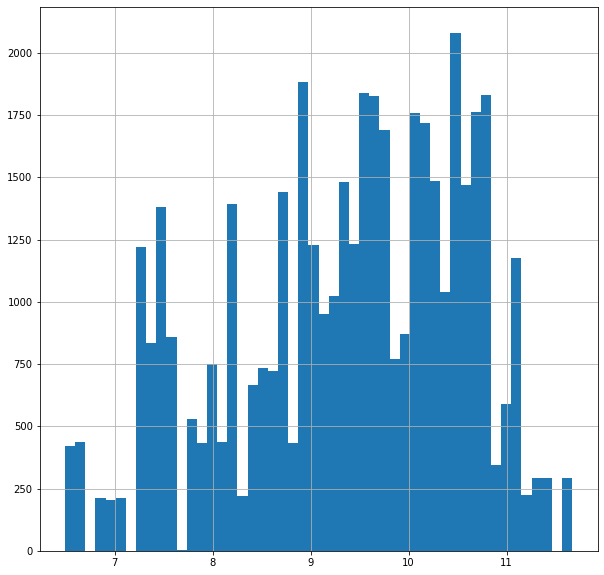

In [65]:
import matplotlib.pyplot as plt 
fig, ax=plt.subplots(1,1,figsize=(10,10))
(df1.loc[:,'gdp_per_capita'].hist(bins=50, ax=ax))
plt.show()

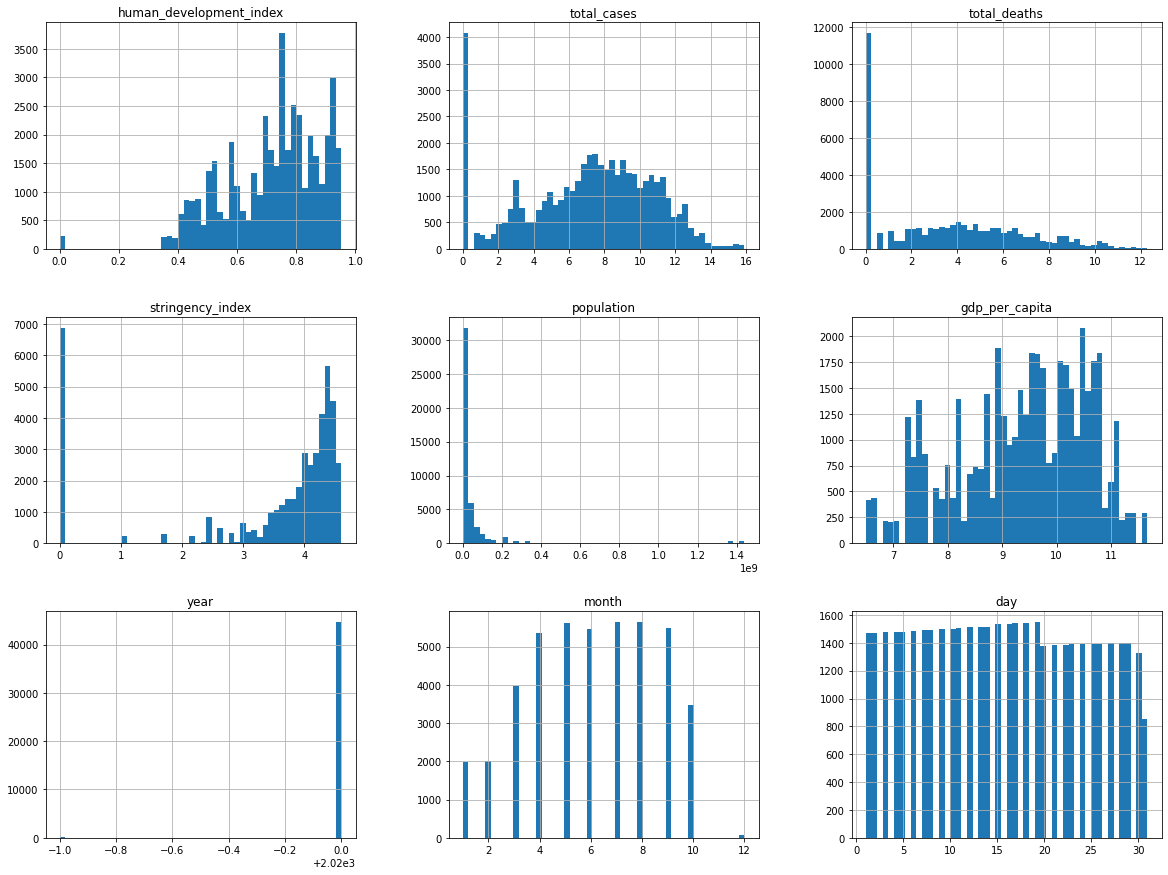

In [69]:
fig, ax=plt.subplots(3,3, figsize=(20,15))
df1.hist(bins=50, ax=ax);

In [67]:
#removing outliers from the target column
df1.drop(df1.index[df1['gdp_per_capita'] ==0], inplace = True)
df1.drop(df1.index[df1['population'] ==0], inplace = True)

In [68]:
#check null values
df1.isna().sum()

country_code                  0
country                       0
date                          0
human_development_index    1370
total_cases                   0
total_deaths                  0
stringency_index              0
population                    0
gdp_per_capita                0
continent                     0
year                          0
month                         0
day                           0
dtype: int64

In [70]:
 #fill NAN values with median
df1['human_development_index'].fillna(df1['human_development_index'].median(), inplace=True)

In [71]:
#drop useless columns
df1.drop(columns=['country_code', 'date', 'continent'], inplace=True)

In [72]:
dff2 = df1.copy()

In [73]:
dff2.drop(columns=['country'], inplace=True)

In [74]:
#plot the corr for our dataframe, interactive heatmap
data = [
      go.Heatmap(
          #corr column and values
          z= dff2.corr().values,
          x=dff2.columns.values,
          y=dff2.columns.values,
          #heatmap color
          colorscale='BuPu',
          reversescale = False)
  ]
#heatmap title and size
layout = go.Layout(
      title="Features' Correlation Of COVID-19 Economic Impact",
      xaxis = dict(ticks='', nticks=36),
      yaxis = dict(ticks='' ),
      width = 900, height = 700)
#display heatmap
fig = go.Figure(data=data, layout=layout)
fig.show()
py.plot(fig, filename = "Features' Correlation", auto_open=True)


# report = dp.Report(dp.Plot(fig) ) #Create a report
# report.publish(name='Correlation Of COVID-19 Economic Impact Features', open=True, visibility='PRIVATE') #Publish the report

'https://plotly.com/~farah12/35/'

In [75]:
import zlib
def in_testing_data(identifier, test_size):
  _hash = zlib.crc32(bytes(identifier))
  return _hasg & 0xffffffff < test_size * 2**32

def split_train_test_by_id(data, test_size, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda identifier: in_testing_data(identifier, test_size))
  return data.loc[~in_test_set] ,data.loc[in_test_set]


In [82]:
from sklearn import model_selection
from sklearn import*
_seed = 42
_random_state = np.random.RandomState(_seed)
training_data, testing_data= model_selection.train_test_split(df1, test_size=0.2, random_state= _random_state)

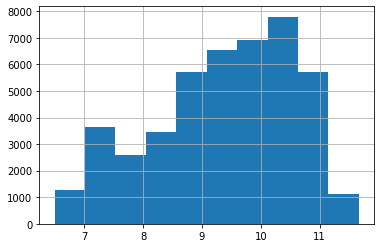

In [83]:
_ = df1.loc[:, 'gdp_per_capita'].hist()

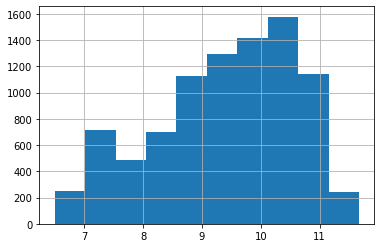

In [84]:
_ = testing_data.loc[:,'gdp_per_capita'].hist()

In [96]:
from sklearn import model_selection
from sklearn import*
_seed = 42
_random_state = np.random.RandomState(_seed)
_gdp_per_capita_strata = pd.cut(df1.loc[:, 'gdp_per_capita'],
                                bins=[5,7.5,9,10.5,11., np.inf],
                                labels=[1,2,3,4,5])
training_data, testing_data= model_selection.train_test_split(df1, test_size=0.2, random_state= _random_state, stratify=_gdp_per_capita_strata)

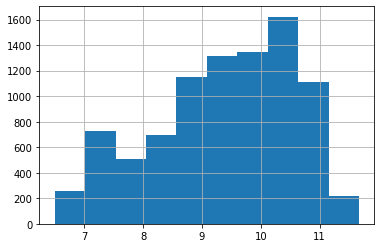

In [97]:
_ = testing_data.loc[:,'gdp_per_capita'].hist()

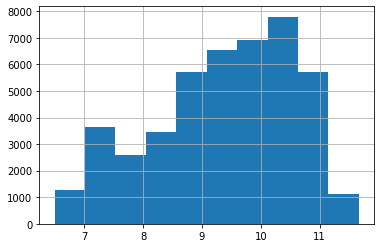

In [98]:
_ = df1.loc[:, 'gdp_per_capita'].hist()

In [101]:
training_data.corr()


,human_development_index,total_cases,total_deaths,stringency_index,population,gdp_per_capita,year,month,day
human_development_index,1.000000,0.106917,0.173135,-0.112682,-0.016581,0.891139,-0.020396,-0.133485,-0.013686
total_cases,0.106917,1.000000,0.917541,0.433940,0.156040,0.089898,0.073511,0.646556,0.011956
total_deaths,0.173135,0.917541,1.000000,0.332725,0.211208,0.145939,0.046025,0.529961,0.001088
stringency_index,-0.112682,0.433940,0.332725,1.000000,0.049187,-0.113508,0.084086,0.160483,0.033449
population,-0.016581,0.156040,0.211208,0.049187,1.000000,-0.023188,-0.012415,-0.052146,-0.002919
gdp_per_capita,0.891139,0.089898,0.145939,-0.113508,-0.023188,1.000000,-0.020080,-0.127798,-0.010928
year,-0.020396,0.073511,0.046025,0.084086,-0.012415,-0.020080,1.000000,-0.091752,-0.067684
month,-0.133485,0.646556,0.529961,0.160483,-0.052146,-0.127798,-0.091752,1.000000,-0.104362
day,-0.013686,0.011956,0.001088,0.033449,-0.002919,-0.010928,-0.067684,-0.104362,1.000000


In [102]:
# correlations between attributes are our target
(training_data.corr()
              .loc[:, "gdp_per_capita"]
              .sort_values(ascending=False))


gdp_per_capita             1.000000
human_development_index    0.891139
total_deaths               0.145939
total_cases                0.089898
day                       -0.010928
year                      -0.020080
population                -0.023188
stringency_index          -0.113508
month                     -0.127798
Name: gdp_per_capita, dtype: float64

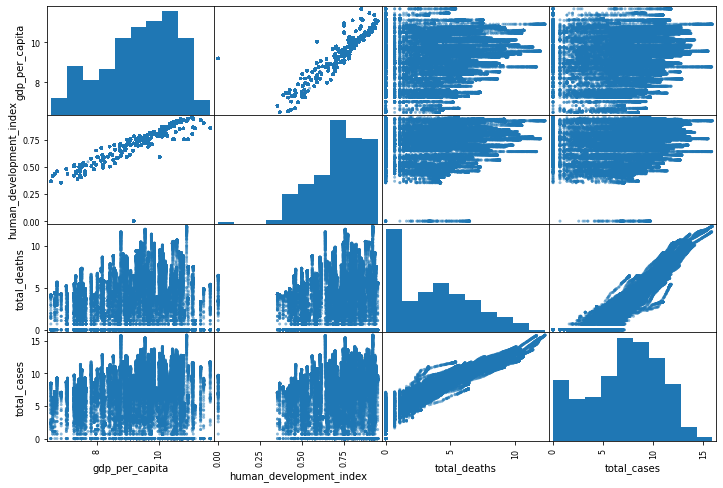

In [103]:
from pandas import plotting


attributes = ["gdp_per_capita",
              "human_development_index",
              "total_deaths",
              "total_cases"]
_ = plotting.scatter_matrix(training_data.loc[:, attributes], figsize=(12, 8))

In [105]:
training_data.head()

,country,human_development_index,total_cases,total_deaths,stringency_index,population,gdp_per_capita,year,month,day
47281,Uganda,0.516,8.811652,4.158883,4.365643,45741000,7.437034,2020,9,23
186,Afghanistan,0.498,10.383565,6.708084,4.365643,38928341,7.497754,2020,7,4
38922,Saint Lucia,0.747,3.218876,0.000000,0.000000,183629,9.468993,2020,8,11
27785,Luxembourg,0.904,7.686162,3.135494,4.377391,625976,11.454003,2020,4,1
30400,Mexico,0.774,13.630377,11.334301,0.000000,128932753,9.760568,2020,10,11


In [ ]:
def _drop_max_values(df, attribute):
    threshold = (df.loc[:, attribute]
                   .max())
    return df.loc[df.loc[:, attribute] < threshold, :]


def clean_dataset(df):
    """
    * Median house values were truncated at 500000 USD. Census block groups with median house values 
      equal to this threshold should be excluded from the analysis.
    * Median income values were truncated at 15 (thousand USD). Census block groups with median income
      values equal to this threshold should be excluded from the analysis.
    * Median housing ages were truncated at 52 years. Census block groups with housing median age 
      values equal to this threshold should be excluded from the analysis.
    
    """
    _df = _drop_max_values(df, "human_development_index")
    _df = _drop_max_values(_df, "gdp_per_capita")
   # _df = _drop_max_values(_df, "total_deaths")
    return _df


In [109]:
def _drop_max_values(df, attribute):
    threshold = (df.loc[:, attribute]
                   .min())
    return df.loc[df.loc[:, attribute] > threshold, :]


def clean_dataset(df):
    """
    * Median house values were truncated at 500000 USD. Census block groups with median house values 
      equal to this threshold should be excluded from the analysis.
    * Median income values were truncated at 15 (thousand USD). Census block groups with median income
      values equal to this threshold should be excluded from the analysis.
    * Median housing ages were truncated at 52 years. Census block groups with housing median age 
      values equal to this threshold should be excluded from the analysis.
    
    """
    _df = _drop_max_values(df, "human_development_index")
    _df = _drop_max_values(_df, "gdp_per_capita")
   # _df = _drop_max_values(_df, "total_deaths")
    return _df


In [110]:
cleaned_training_df = clean_dataset(training_data)

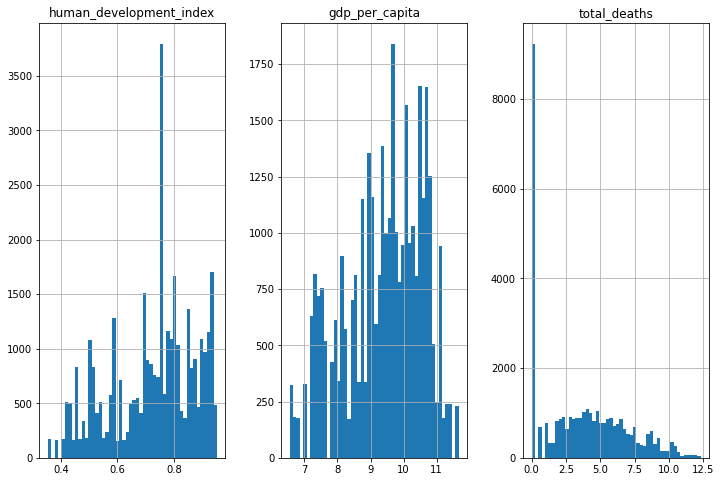

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
_ = (cleaned_training_df.loc[:, ["human_development_index", "gdp_per_capita", "total_deaths"]]
                        .hist(bins=50, ax=ax))


In [112]:
cleaned_training_df.isna().sum()

country                    0
human_development_index    0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
year                       0
month                      0
day                        0
dtype: int64

In [113]:
#onehotencoder for catecorical columns
cleaned_training_df=pd.get_dummies(cleaned_training_df)

In [114]:
#check shapd of data after get_dummies
cleaned_training_df.shape

(35409, 191)

In [115]:
cleaned_training_df.head()

,human_development_index,total_cases,total_deaths,stringency_index,population,gdp_per_capita,year,month,day,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,...,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten (Dutch part),country_Slovakia,country_Slovenia,country_Solomon Islands,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor,country_Togo,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
47281,0.516,8.811652,4.158883,4.365643,45741000,7.437034,2020,9,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
186,0.498,10.383565,6.708084,4.365643,38928341,7.497754,2020,7,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38922,0.747,3.218876,0.000000,0.000000,183629,9.468993,2020,8,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27785,0.904,7.686162,3.135494,4.377391,625976,11.454003,2020,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30400,0.774,13.630377,11.334301,0.000000,128932753,9.760568,2020,10,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn import pipeline


numerical_pipeline = pipeline.Pipeline(
    steps=[
        ('imputer', impute.SimpleImputer(strategy="median")),
        ('standard_scaler', preprocessing.StandardScaler())
    ],
)

categorical_pipeline = pipeline.Pipeline(
    steps=[
        ("one_hot_encoder", preprocessing.OneHotEncoder())
    ],
)

In [118]:
training_features_df = cleaned_training_df.drop("gdp_per_capita", axis=1)
training_target_df = cleaned_training_df.loc[:, ["gdp_per_capita"]]

In [119]:
from sklearn import linear_model


regressor = linear_model.LinearRegression()
regressor.fit(training_features_df, training_target_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
from sklearn import metrics


predictions = regressor.predict(training_features_df)
mse = metrics.mean_squared_error(training_target_df, predictions)
rmse = mse**0.5

In [121]:
rmse # units are USD

5.248265048199502e-07

In [122]:
from sklearn import tree


regressor = tree.DecisionTreeRegressor()
regressor.fit(training_features_df, training_target_df)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
predictions = regressor.predict(training_features_df)
mse = metrics.mean_squared_error(training_target_df, predictions)
rmse = mse**0.5

In [127]:
rmse

2.3867879506199134e-14

In [128]:
from sklearn import model_selection


linear_regression_scores = model_selection.cross_val_score(linear_model.LinearRegression(),
                                                           X=training_features_df,
                                                           y=training_target_df,
                                                           cv=10,
                                                           scoring="neg_mean_squared_error",
                                                           n_jobs=10)

In [129]:
def display_rmses(rmses):
    print("RMSE mean:", rmses.mean())
    print("RMSE standard deviation:", rmses.std())


In [130]:
linear_regression_rmses = np.sqrt(-linear_regression_scores)
display_rmses(linear_regression_rmses)

RMSE mean: 0.0010269674239502175
RMSE standard deviation: 0.0030787235369791103


In [131]:
from sklearn import ensemble


_random_state = np.random.RandomState(42)
regressor = ensemble.RandomForestRegressor(random_state=_random_state)
regressor.fit(training_features_df, training_target_df.iloc[:, 0].ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x7F20C51AD050,
                      verbose=0, warm_start=False)

In [132]:
predictions = regressor.predict(training_features_df)
mse = metrics.mean_squared_error(training_target_df, predictions)
rmse = mse**0.5

In [133]:
rmse

0.0005974667194191413

In [134]:
_random_state = np.random.RandomState(42)
random_forest_scores = model_selection.cross_val_score(ensemble.RandomForestRegressor(random_state=_random_state),
                                                       X=training_features_df,
                                                       y=training_target_df,
                                                       cv=10,
                                                       scoring="neg_mean_squared_error",
                                                       n_jobs=10)

In [135]:
random_forest_rmses = np.sqrt(-random_forest_scores)
display_rmses(random_forest_rmses)

RMSE mean: 0.0008944476678917835
RMSE standard deviation: 0.0019376901712018888


In [136]:
from sklearn import neighbors

In [138]:
knn_scores = model_selection.cross_val_score(neighbors.KNeighborsRegressor(),
                                             X=training_features_df,
                                             y=training_target_df,
                                             cv=10,
                                             scoring="neg_mean_squared_error",
                                             n_jobs=10)

In [139]:
knn_rmses = np.sqrt(-knn_scores)
display_rmses(knn_rmses)

RMSE mean: 0.003372250378935785
RMSE standard deviation: 0.010116751136806674


In [140]:
from sklearn import svm

In [ ]:
svr_scores = model_selection.cross_val_score(svm.SVR(),
                                             X=training_features_df,
                                             y=training_target_df,
                                             cv=10,
                                             scoring="neg_mean_squared_error",
                                             n_jobs=10)

In [ ]:
svr_rmses = np.sqrt(-svr_scores)
display_rmses(svr_rmses)

In [ ]:
#split our data into dependent(X) and independent(y) column
X=df1.drop(['gdp_per_capita'],axis=1)
y=df1['gdp_per_capita']

### Feature Selections: 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
#lasso performs feature selection that can pick relevant features that will be useful for modelling
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))

In [ ]:
#fit data into feature selection model
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#check for best feature
feature_sel_model.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#best feature colusmns
cols=X.columns

In [ ]:
#check for total features, and the best feature for modeling 
selected_feature = cols[feature_sel_model.get_support()]

In [ ]:
#print total feature and selected feature
print("total_features: {}".format(X.shape[1]))
print("selected features: {}".format(len(selected_feature)))

total_features: 192
selected features: 13


In [ ]:
selected_feature

Index(['human_development_index', 'total_cases', 'total_deaths',
       'stringency_index', 'country_Bermuda', 'country_Cayman Islands',
       'country_Equatorial Guinea', 'country_Kosovo', 'country_Kuwait',
       'country_Luxembourg', 'country_Qatar', 'country_San Marino',
       'country_United Arab Emirates'],
      dtype='object')

In [ ]:
#fit selected feature into X
X=X[selected_feature]

### Split our data into tain_test_split:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

### Since we have a regression problem, we will use MAE and RMSE to evaluate our models.

In [ ]:
from sklearn import metrics
#function to fit train data into model, apply cross validation, and calculate MAE , MSE and RMSE
def predict(ml_model):
  #fit trainin set into model
  model = ml_model.fit(X_train, y_train)
  #cross validate model
  coross_fal = cross_val_score(model,X_train, y_train, cv=10, n_jobs=-1)

  #predict x_test
  predictions = model.predict(X_test)
  #print("predictions: {}".format(predictions))
  print("\n")
  #caluculate R2  score, MAE, RMSE
  r2_score = metrics.r2_score(y_test, predictions)
  print("R2 Score: {}".format(r2_score))
  print("MAE Score:", metrics.mean_absolute_error(y_test, predictions))
  print("RMSE Score:",np.sqrt(metrics.mean_absolute_error(y_test, predictions)))
  

### 1- LinearRegression Model:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict(LinearRegression())



R2 Score: 0.9261595229666666
MAE Score: 0.2402406844123298
RMSE Score: 0.49014353450018067


### Grid search to optimized our model:

In [ ]:
model =LinearRegression()
param_grid ={'fit_intercept': [True, False],
             'n_jobs':[-1,None],
             'normalize':[True,False]}
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)


In [ ]:
grid_result.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [ ]:
grid_result.best_score_

0.9283885126876091

### After using grid search we can notice that we have the same result.

### In this part of data modelling, we used LinearRegression and RandomForest. Moreover, to evaluate our model performance, we used MAE because it is conceptually the easiest evaluation metric for regression problem and it answers the question "How far were you off in your predictions, on average?"
### Here we obtained 0.24 which is a good score.
### Finally, we used RMSE, which is the most commonly used in the regression. Moreover, it is defined as the square root of the average squared distance between the actual score and prediction score. Here we have 0.49.
### In the Baseline model, we got 0.11, furthermore, the previous result is better than the Baseline model.

#Improvements: 

### In my point of view, I think I got to a point where we have good results and we understand the data we have very well. But to make our results even better, I would try to improve data collection I will also try to get even more data for the last 5 years to compare the GPD per capita before and after this global pandemic Because collecting more data is always lead us to improve our model results.

# Conclusion:
### To conclude, In this project, we tried to analyze and build models to predict the best GDP per capita. Firstly, I explored our dataset and make some data wrangling before prepare data for modelling Then I did EDA on the data after cleaning. From that analysis, I found out that GDP per capita changing from country to country depends on some features such as human development index, total cases, total deaths, stringency index and rate of population. I dug deep to see who countries affected by Covid-19, and I found that most of the countries all over the world affected by this global pandemic according to the rate of cases and deaths. Finally, My plan for the next step, comparing these outcomes with the global economy for the last 5 years all over the world then we will find significant results under Covid-19.

## Resources:
- [THE IMPACT OF COVID-19 PANDEMIC ON THE GLOBAL ECONOMY.](http://www.conscientiabeam.com/pdf-files/eco/29/EFL20218(1)32-43.pdf)

- [Impact of Covid-19 Pandemic on the Global Economy.](https://www.kaggle.com/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy/)

- [Plotly.](https://chart-studio.plotly.com/)
- [Lasso.](https://medium.com/all-about-ml/search?q=Lasso)
- [LinearRegression.](https://medium.com/all-about-ml/linear-regression-d41a6a5dcab6)